# Problema de agrupamento

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn import metrics

from sklearn.metrics import accuracy_score as accuracy

In [15]:
dataBase = pd.read_csv('./dados/Engajamento.csv')
dataBase.head()

,Horas,Taxa de Cliques,Classe
0,1007.084589,1.582099,1
1,1005.886193,1.524809,1
2,1005.609471,0.846857,1
3,989.814354,2.841944,2
4,995.328807,3.569900,3


### Moltando a features e visualização

In [18]:
features = dataBase[['Horas','Taxa de Cliques']]  # Para modelos de cluster não precisamos de campos veturizados

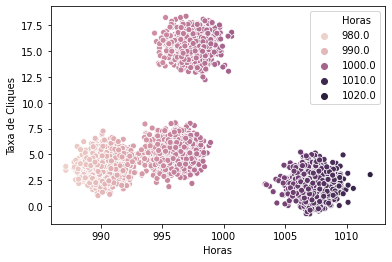

In [19]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', hue='Horas', data=features)

### Escolhendo o modelo

In [20]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [21]:
kmeans.fit(features)

KMeans(n_clusters=2, random_state=0)

### Visualizando os resuldados

In [22]:
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

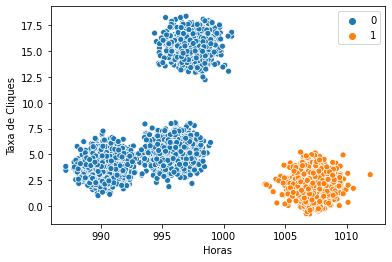

In [24]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', hue=kmeans.labels_, data=features)

#### Testando com mais grupos

In [25]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [26]:
kmeans.fit(features)

KMeans(n_clusters=4, random_state=0)

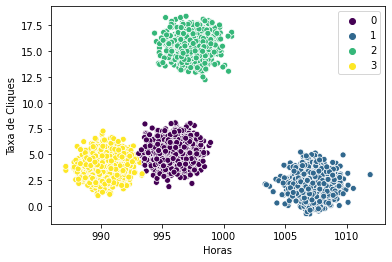

In [40]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', hue=kmeans.labels_, palette='viridis', data=features)

### Testando um algoritmo Optics

In [51]:
clust_optics = OPTICS(min_samples=800).fit(features)  # min_samples escolhemos o minimo de elementos por grupos

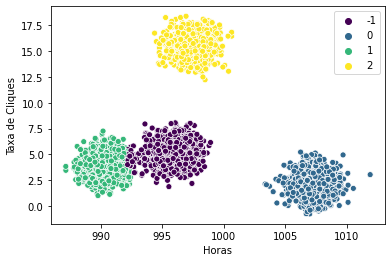

In [52]:
sns.scatterplot(x='Horas', y='Taxa de Cliques', hue=clust_optics.labels_, palette='viridis', data=features)

## Calculando a Accuracy Optics

In [66]:
class_conhecida = dataBase['Classe']
class_previsto = clust_optics.labels_

#### Testando a accuracy

In [73]:
print(f'Total de precisão: {round(metrics.adjusted_rand_score(class_conhecida, class_previsto),2) * 100}%')

Total de precisão: 98.0%


## Calculando a Accuracy KMeans

In [76]:
class_conhecida = dataBase['Classe']
class_previsto = kmeans.labels_

#### Testando a accuracy

In [77]:
print(f'Total de precisão: {round(metrics.adjusted_rand_score(class_conhecida, class_previsto),2) * 100}%')

Total de precisão: 100.0%


In [86]:
result = metrics.silhouette_score(features, kmeans.labels_, metric='euclidean')  # Testa a features com a predict

In [87]:
print(f'Total de precisão: {round(result,2) * 100}%')

Total de precisão: 76.0%


In [88]:
result = metrics.silhouette_score(features, clust_optics.labels_, metric='euclidean')  # Testa a features com a predict

In [89]:
print(f'Total de precisão: {round(result,2) * 100}%')

Total de precisão: 76.0%
